In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [30]:
Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array

datadir= "C:/Users/abhir/OneDrive/Desktop/MVG/ASSIGNMENT/image understanding/dataset/training_set"

for i in Categories:
      
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(120,120,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

    
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [31]:
df = pd.DataFrame(flat_data)
df['Target'] = target
print("Data shape:", df.shape)

Data shape: (8000, 43201)


In [32]:
# Define X and y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [53]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=42)

In [54]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=100)  # Reduced components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [55]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, C=1))

In [56]:
# Train model
print("Training the model...")
pipe.fit(x_train_pca, y_train)
print("Model training complete!")

Training the model...
Model training complete!


In [57]:
# Testing the model using the testing data
y_pred = pipe.predict(x_test_pca)

In [58]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 63.916666666666664% accurate


In [59]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.63      0.69      0.66      1206
         dog       0.65      0.59      0.62      1194

    accuracy                           0.64      2400
   macro avg       0.64      0.64      0.64      2400
weighted avg       0.64      0.64      0.64      2400



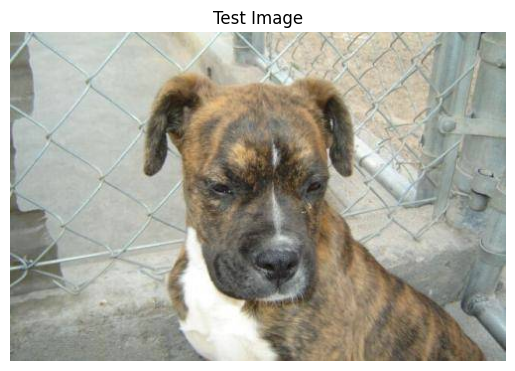

cats: 20.84%
dogs: 79.16%
The predicted image is: dogs


In [68]:
test_img_path = "C:/Users/abhir/OneDrive/Desktop/MVG/ASSIGNMENT/image understanding/dataset/test_set/dogs/dog.4099.jpg"
img = imread(test_img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

img_resized = resize(img, (120, 120, 3)).flatten()
img_pca = pca.transform([img_resized])
prediction = pipe.predict(img_pca)
confidence = pipe.predict_proba(img_pca)

# Show probabilities
for i, category in enumerate(Categories):
    print(f"{category}: {confidence[0][i]*100:.2f}%")

print("The predicted image is:", Categories[prediction[0]])